### Домашнее задание по дисциплине "Информационные технологии при проектировании РиСО"
### Студент: Берулава И.М., группа СМ6-71
### Получившаяся дальность ЛА: **69209.1876** м

In [7]:
from rocketlib import Rocket

def my_alpha_foo(t, v, x, y, theta, P, m, rho, M, Cya, Cx0, Sm):
    if theta > 30:
        return 2.55394774e+00
    elif theta > 15:
        return 2.75674502e+00
    elif theta > 5:
        return 7.85742196e-01
    elif theta >= 0:
        return 7.43827426e+00
    elif theta >= -15:
        return 9.99732290e+00
    elif theta > -40:
        return 2.21249466e+00
    else:
        return -9.22716364e-01

opts = {
    'theta': 4.40303938e+01,
    'P1': 4.81117293e+03,
    'P2': 1.78970830e+02,
    'omega1': Rocket.OMEGA_SUM_MAX * 4.73960160e-01,
    'omega2': Rocket.OMEGA_SUM_MAX - Rocket.OMEGA_SUM_MAX * 4.73960160e-01
}

In [8]:
from rocketlib import throw_foo
import matplotlib.pyplot as plt

res = throw_foo(opts, my_alpha_foo) 

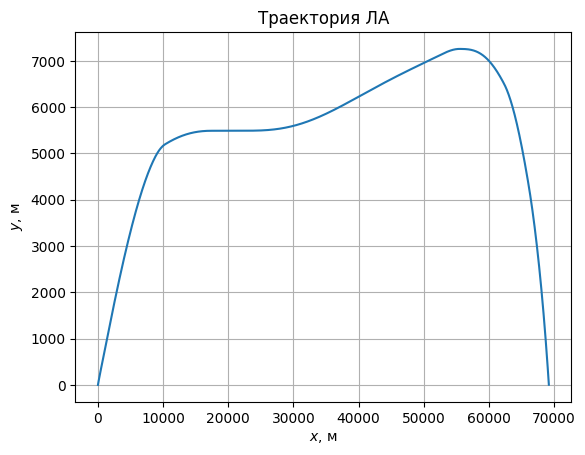

In [25]:
plt.plot(res['x'], res['y'])
plt.xlabel('$x$, м')
plt.ylabel('$y$, м')
plt.title('Траектория ЛА')
plt.grid()
plt.show()

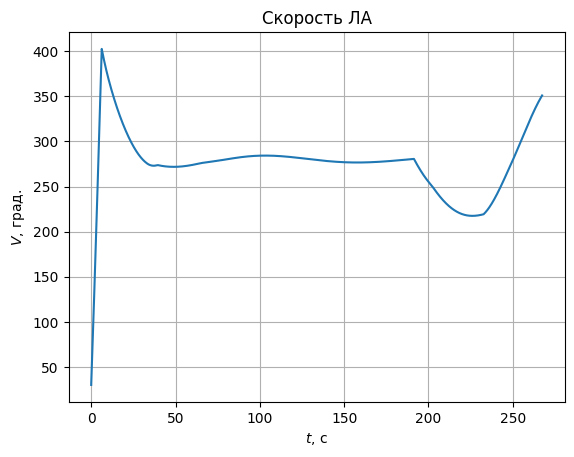

In [26]:
plt.plot(res['t'], res['v'])
plt.xlabel('$t$, с')
plt.ylabel('$V$, град.')
plt.grid()
plt.title('Скорость ЛА')
plt.show()

### ограничение скорости

In [6]:
res['v'][-1]

350.93279754047296

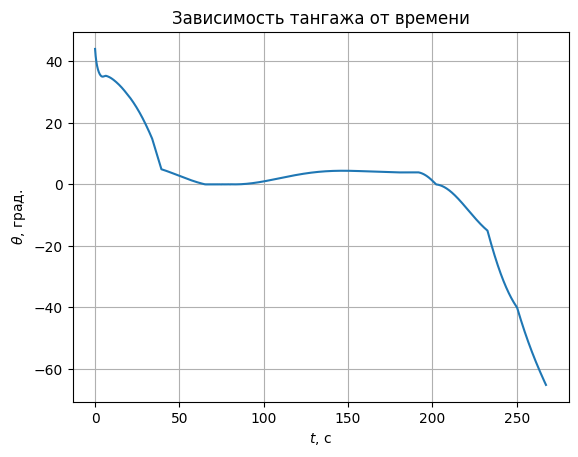

In [27]:
plt.plot(res['t'], res['theta'])
plt.xlabel('$t$, с')
plt.ylabel('$\\theta$, град.')
plt.title('Зависимость тангажа от времени')
plt.grid()
plt.show()

### дальность полета

In [5]:
res['x'][-1]

69209.18760408148

# Необязательная часть домашнего задания

In [9]:
from rocketlib import Rocket, throw_foo 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import differential_evolution

In [10]:
mins = np.array([30, 2000, 100, 0.2, -10, -10, -10, -10, -10, -10, -10])
maxes= np.array([70, Rocket.P_MAX, 500, 0.7, 10, 10, 10, 10, 10, 10, 10])
bounds = np.array([(0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1)])

def denormalize(X):
    return mins + X*(maxes-mins)

def normalize(X):
    return (X - mins) / (maxes-mins)

# проверяем ограничения
def check(res):
    if (res['v'][-1] < 350) or ((res['theta'][-1] < -90) or  (res['theta'][-1] > -65)) or (res['x'][-1] < 50000) or (res['y'][-1] > 10): 
        return False
    return True
# минимизация функции, углы для тангажа подобраны перебором, так что это не оптимальные значения
def minimize_foo(X):   
    point = denormalize(X)
    theta, P1, P2, om_port, a1, a2, a3, a4, a5, a6, a7 = point
    def my_alpha_foo(t, v, x, y, theta, P, m, rho, M, Cya, Cx0, Sm):
        if theta > 30:
            return a7
        elif theta > 15:
            return a1
        elif theta > 5:
            return a2
        elif theta >= 0:
            return a3
        elif theta >= -15:
            return a4
        elif theta > -40:
            return a5
        else:
            return a6
    
    opts = {
        'theta': theta,
        'P1': P1,
        'P2': P2,
        'omega1': Rocket.OMEGA_SUM_MAX * om_port,
        'omega2': Rocket.OMEGA_SUM_MAX - Rocket.OMEGA_SUM_MAX * om_port
    }
    res = throw_foo(opts, my_alpha_foo, print_errors=False)
    crit = res['x'][-1]
    if check(res):
        return -1*crit
    return 0

In [ ]:
result = differential_evolution(minimize_foo, bounds)

In [ ]:
print(result.fun)
print(denormalize(result.x))
print(res['v'][-1])
print(res['theta'][-1])